# Topic 2  Basic Computer Vision Techniques


In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import urllib

print(cv2.__version__)

4.4.0


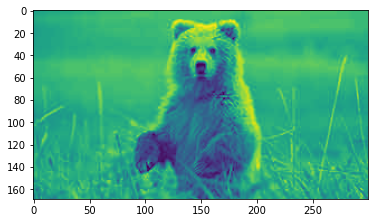

In [20]:
img = cv2.imread('test-bear.jpg',0)
plt.imshow(img)

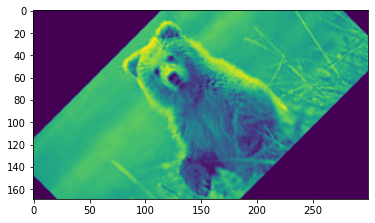

In [22]:
img = cv2.imread('test-bear.jpg',0)
rows,cols = img.shape

M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

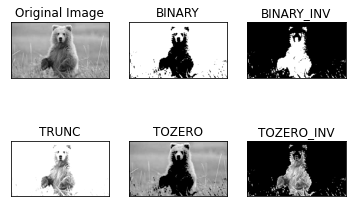

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('test-bear.jpg',0)
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

# Topic 3  Image Classification


In [ ]:
#!/usr/bin/python3
#
# Copyright (c) 2019, NVIDIA CORPORATION. All rights reserved.
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT.  IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.
#

import jetson.inference
import jetson.utils

import argparse


# parse the command line
parser = argparse.ArgumentParser()
parser.add_argument("filename", type=str, help="filename of the image to process")
parser.add_argument("--network", type=str, default="googlenet", help="model to use, can be:  googlenet, resnet-18, ect.")
opt = parser.parse_args()

# load an image (into shared CPU/GPU memory)
img = jetson.utils.loadImage(opt.filename)

# load the recognition network
net = jetson.inference.imageNet(opt.network)

# classify the image
class_idx, confidence = net.Classify(img)

# find the object description
class_desc = net.GetClassDesc(class_idx)

# print out the result
print("image is recognized as '{:s}' (class #{:d}) with {:f}% confidence".format(class_desc, class_idx, confidence * 100))

# Topic 4 Object Detection


In [ ]:
#!/usr/bin/python3
#
# Copyright (c) 2019, NVIDIA CORPORATION. All rights reserved.
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT.  IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.
#

import jetson.inference
import jetson.utils

net = jetson.inference.detectNet("ssd-mobilenet-v2", threshold=0.5)
camera = jetson.utils.videoSource("csi://0")      # '/dev/video0' for V4L2
display = jetson.utils.videoOutput("display://0") # 'my_video.mp4' for file

while display.IsStreaming():
	img = camera.Capture()
	detections = net.Detect(img)
	display.Render(img)
	display.SetStatus("Object Detection | Network {:.0f} FPS".format(net.GetNetworkFPS()))